In [46]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.2 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/300.2 kB 1.8 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 2.0 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import seaborn as sns

In [21]:
#Load the Data
stream_df = pd.read_csv("spotify_data.csv")

In [22]:
stream_df.head()

,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,0,2020-02-24T03:25:10Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",66094,IN,42.106.46.255,unknown,Feel so Lucky,T.L.I.D,...,NaN,NaN,NaN,playbtn,trackdone,False,NaN,0.0,1.582515e+12,False
1,1,2020-02-24T03:27:51Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",160353,IN,42.106.46.255,unknown,Me & You,T.L.I.D,...,NaN,NaN,NaN,trackdone,trackdone,False,NaN,0.0,1.582515e+12,False
2,2,2020-02-24T03:29:52Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",119683,IN,42.106.46.255,unknown,Lost in Space,T.L.I.D,...,NaN,NaN,NaN,trackdone,endplay,False,NaN,0.0,1.582515e+12,False
3,3,2020-02-24T03:30:07Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",13409,IN,42.106.46.255,unknown,Just The Way You Are,Bruno Mars,...,NaN,NaN,NaN,clickrow,endplay,False,NaN,0.0,1.582515e+12,False
4,4,2020-02-24T03:30:59Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",43399,IN,42.106.46.255,unknown,HIGHEST IN THE ROOM,Travis Scott,...,NaN,NaN,NaN,clickrow,trackdone,False,NaN,0.0,1.582515e+12,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41389 entries, 0 to 41388
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         41389 non-null  int64  
 1   ts                                 41389 non-null  object 
 2   username                           41389 non-null  object 
 3   platform                           41389 non-null  object 
 4   ms_played                          41389 non-null  int64  
 5   conn_country                       41389 non-null  object 
 6   ip_addr_decrypted                  41389 non-null  object 
 7   user_agent_decrypted               41389 non-null  object 
 8   master_metadata_track_name         40638 non-null  object 
 9   master_metadata_album_artist_name  40638 non-null  object 
 10  master_metadata_album_album_name   40638 non-null  object 
 11  spotify_track_uri                  40638 non-null  obj

In [24]:
df.nunique()

Unnamed: 0                           41389
ts                                   38675
username                                 1
platform                                16
ms_played                            24683
conn_country                             1
ip_addr_decrypted                     2282
user_agent_decrypted                     1
master_metadata_track_name            2584
master_metadata_album_artist_name     1062
master_metadata_album_album_name      1979
spotify_track_uri                     2804
episode_name                            27
episode_show_name                       13
spotify_episode_uri                     27
reason_start                             9
reason_end                               9
shuffle                                  2
skipped                                  2
offline                                  2
offline_timestamp                    41085
incognito_mode                           1
dtype: int64

### Data Cleaning and Transformation

In [25]:
spotify_stream_df = stream_df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name']]
spotify_stream_df.head(2)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
0,2020-02-24T03:25:10Z,66094,Feel so Lucky,T.L.I.D
1,2020-02-24T03:27:51Z,160353,Me & You,T.L.I.D


In [26]:
spotify_stream_df['ts'] = pd.to_datetime(spotify_stream_df['ts'])

# Change the format of the timestamps
spotify_stream_df['ts'] = spotify_stream_df['ts'].dt.strftime('%Y-%m-%d %H:%M')

spotify_stream_df.head(2)

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\3949729254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df['ts'] = pd.to_datetime(spotify_stream_df['ts'])
C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\3949729254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df['ts'] = spotify_stream_df['ts'].dt.strftime('%Y-%m-%d %H:%M')


,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
0,2020-02-24 03:25,66094,Feel so Lucky,T.L.I.D
1,2020-02-24 03:27,160353,Me & You,T.L.I.D


In [29]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["ts"]) # To create a additional column

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\4143466898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["ts"]) # To create a additional column


In [30]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\1178514523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\1178514523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\1178514523.py:3: SettingWithCopyWa

In [35]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["ms_played"], unit='ms')

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\1830110679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["ms_played"], unit='ms')


In [36]:
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\1010896447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\1010896447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)


In [38]:
spotify_stream_df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-02-24 03:25,66094,Feel so Lucky,T.L.I.D,2020-02-24 03:25:00,2020,2,24,0,03:25:00,3,Monday,1,0 days 00:01:06.094000,0.018,1.100
1,2020-02-24 03:27,160353,Me & You,T.L.I.D,2020-02-24 03:27:00,2020,2,24,0,03:27:00,3,Monday,1,0 days 00:02:40.353000,0.044,2.667
2,2020-02-24 03:29,119683,Lost in Space,T.L.I.D,2020-02-24 03:29:00,2020,2,24,0,03:29:00,3,Monday,1,0 days 00:01:59.683000,0.033,1.983
3,2020-02-24 03:30,13409,Just The Way You Are,Bruno Mars,2020-02-24 03:30:00,2020,2,24,0,03:30:00,3,Monday,1,0 days 00:00:13.409000,0.004,0.217
4,2020-02-24 03:30,43399,HIGHEST IN THE ROOM,Travis Scott,2020-02-24 03:30:00,2020,2,24,0,03:30:00,3,Monday,1,0 days 00:00:43.399000,0.012,0.717


In [39]:
spotify_stream_df.drop(columns=["ts","Time-Played (hh-mm-ss)","ms_played"], inplace=True)

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\133753669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df.drop(columns=["ts","Time-Played (hh-mm-ss)","ms_played"], inplace=True)


In [42]:
spotify_stream_df.describe()

,Play-Time,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,41389,41389.000000,41389.000000,41389.000000,41389.000000,41389.000000,41389.0,41389.000000,41389.000000
mean,2021-07-20 01:44:53.166300160,2021.068376,6.282877,15.792409,2.805987,11.589021,1.0,0.028755,1.725259
min,2020-02-24 03:25:00,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2020-09-13 18:58:00,2020.000000,3.000000,8.000000,1.000000,6.000000,1.0,0.001000,0.083000
50%,2021-05-21 11:51:00,2021.000000,6.000000,16.000000,3.000000,11.000000,1.0,0.018000,1.050000
75%,2022-05-05 03:44:00,2022.000000,9.000000,23.000000,5.000000,18.000000,1.0,0.054000,3.250000
max,2023-05-12 14:05:00,2023.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.836000,50.183000
std,NaN,0.995259,3.529967,8.622256,1.970462,6.500725,0.0,0.032211,1.932578


In [ ]:
# Exploratory Data Analysis

In [43]:
top_10_artist_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
The Chainsmokers,74.279,4452.327,2448
A.R. Rahman,71.725,4301.592,1610
Calvin Harris,56.292,3375.265,1957
Anirudh Ravichander,52.776,3166.078,1595
Yuvan Shankar Raja,35.305,2119.520,998
Martin Garrix,34.727,2084.966,1335
Harris Jayaraj,30.283,1818.136,826
Hiphop Tamizha,28.602,1711.259,776
Vivek - Mervin,24.749,1489.636,523


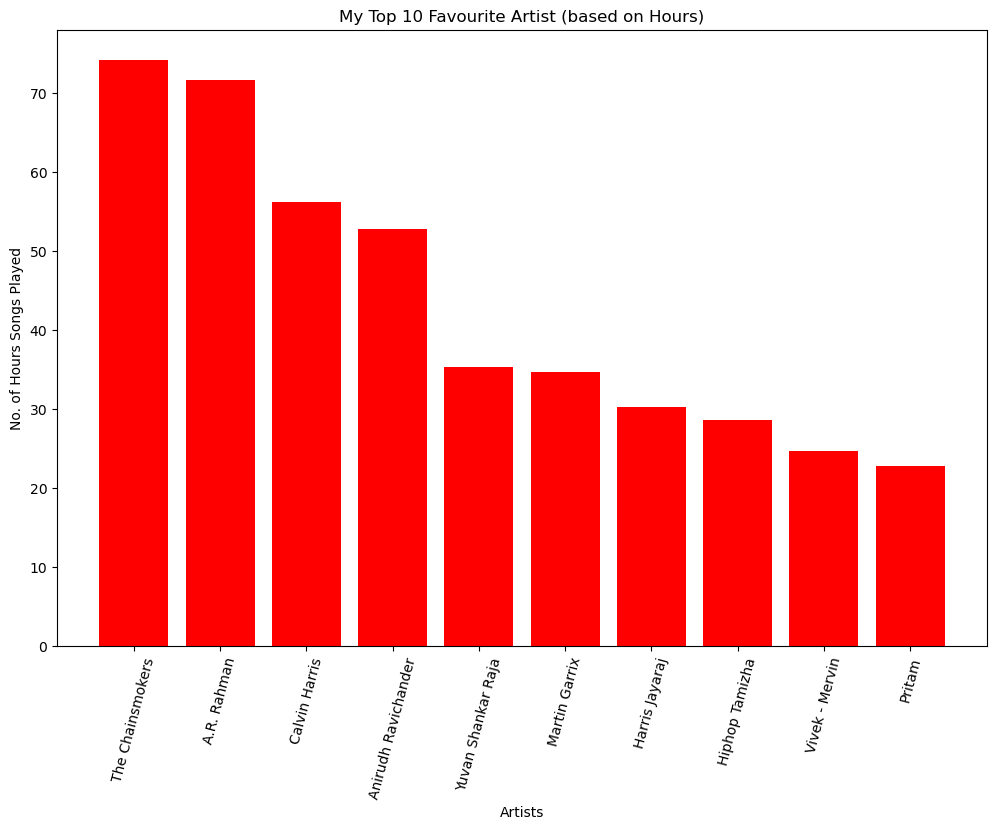

In [61]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["Listening Time(Hours)"].head(10),color='r')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

In [56]:
top_10_artist_count_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
The Chainsmokers,74.279,4452.327,2448
Calvin Harris,56.292,3375.265,1957
A.R. Rahman,71.725,4301.592,1610
Anirudh Ravichander,52.776,3166.078,1595
Martin Garrix,34.727,2084.966,1335
Yuvan Shankar Raja,35.305,2119.520,998
Harris Jayaraj,30.283,1818.136,826
Hiphop Tamizha,28.602,1711.259,776
Marshmello,17.724,1064.366,743


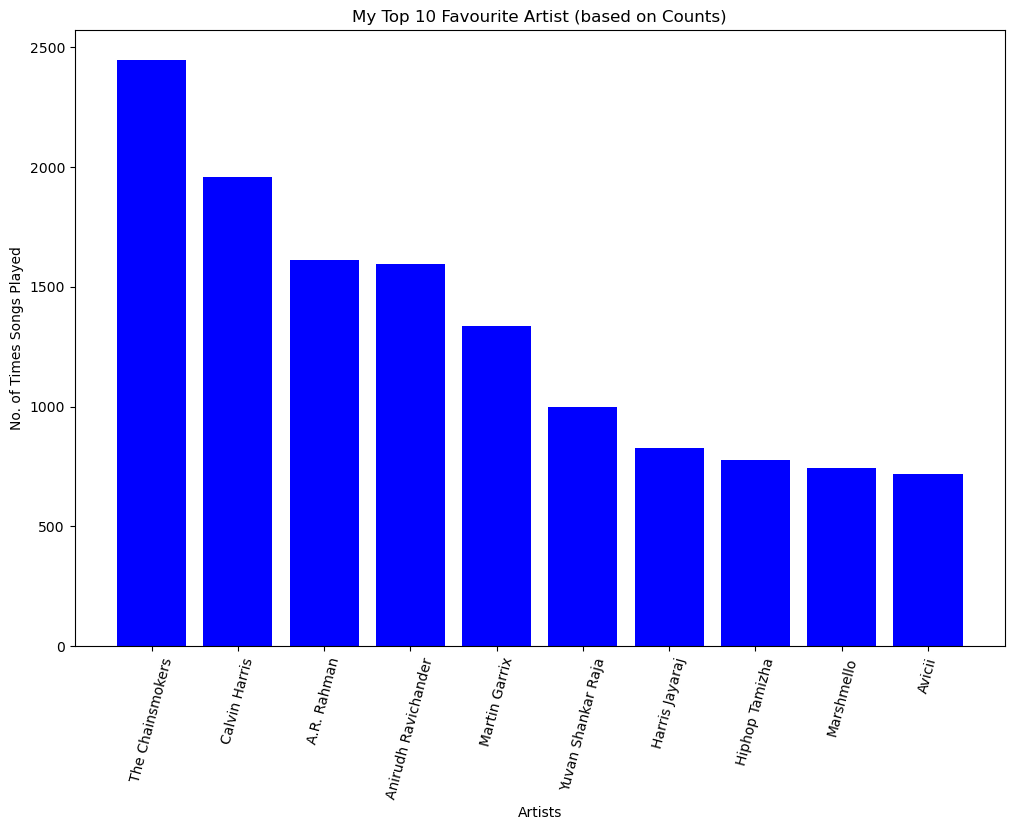

In [62]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='b')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

In [63]:
# Exploring Songs Tracks

In [64]:
unique_songs = spotify_stream_df["master_metadata_track_name"].nunique()
total_songs = spotify_stream_df["master_metadata_track_name"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

6.358580638810965

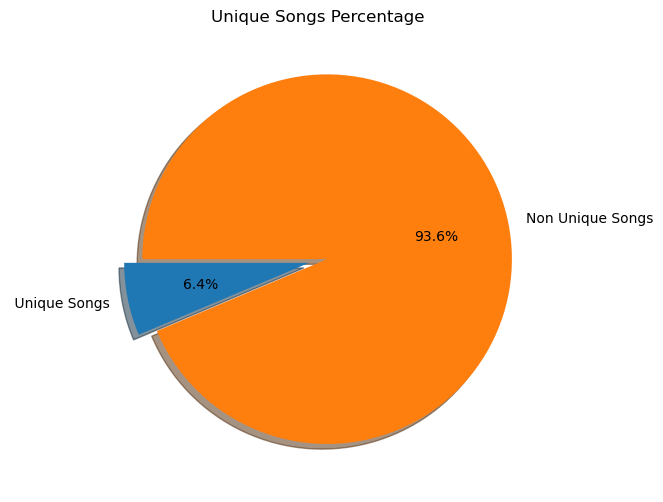

In [67]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

In [68]:
# Top 10 Unique Songs

In [69]:
top_10_songs_time_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

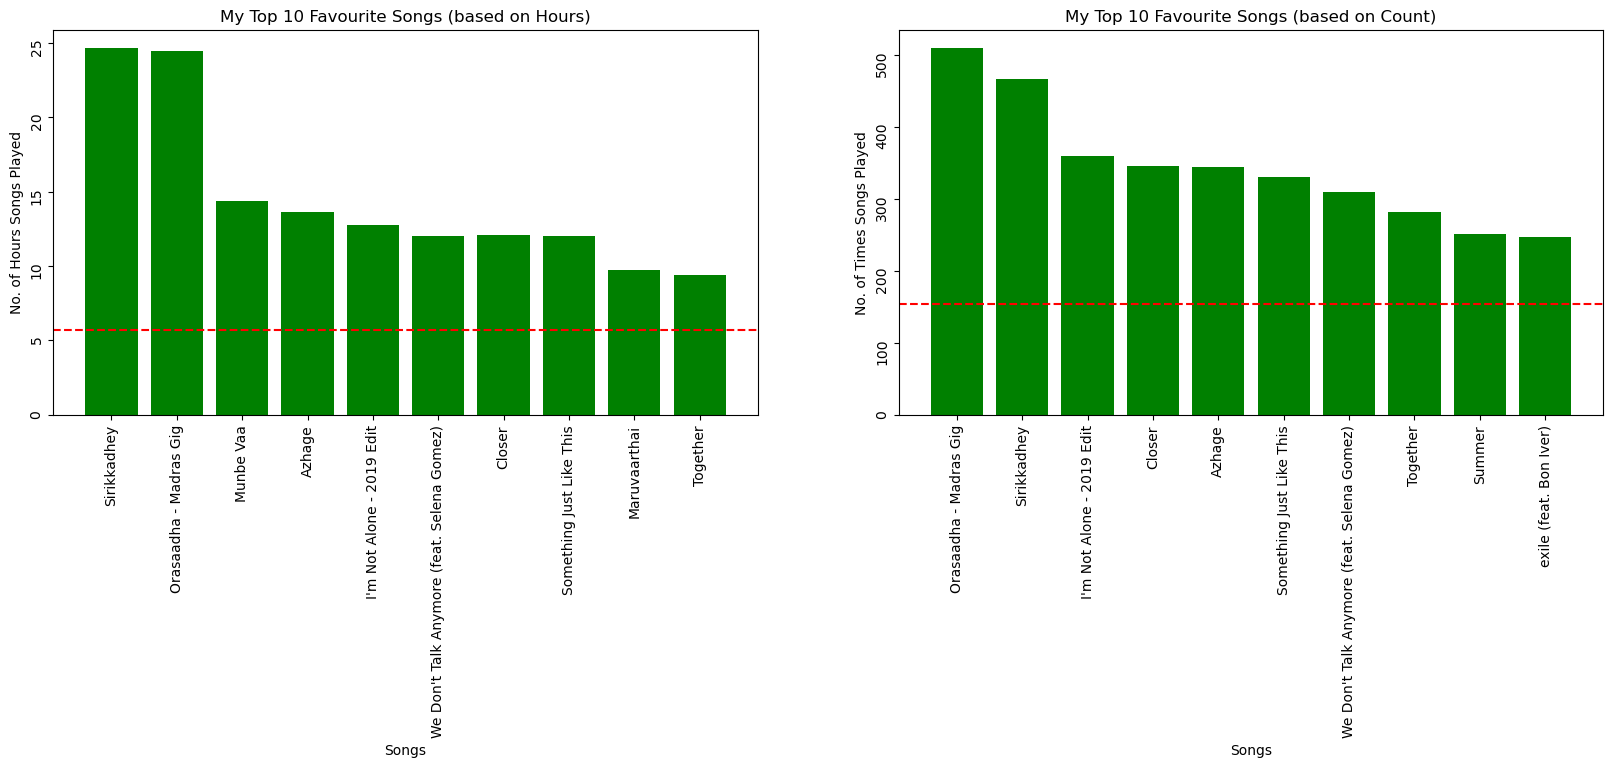

In [70]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Songs (based on Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

### Daily Usage

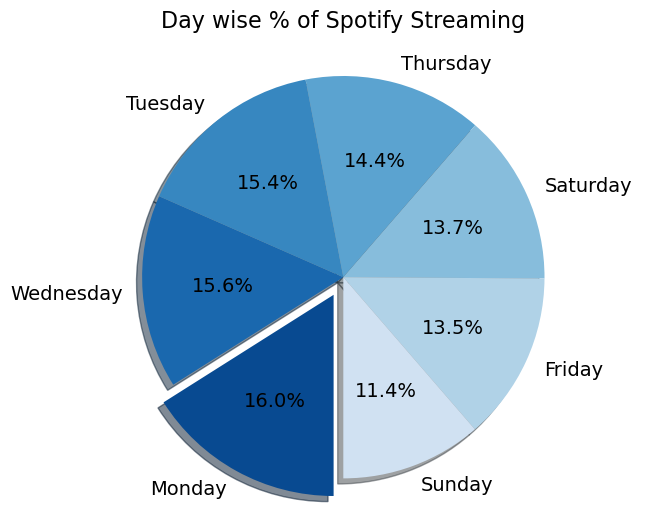

In [72]:
import matplotlib.cm as cm

day_name_counts = spotify_stream_df["day-name"].value_counts()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
colors = cm.Blues(np.linspace(0.9, 0.2, len(day_name_counts)))

# Get the maximum index
max_index = day_name_counts.argmax()

# Create an explode list
explode = [0] * len(day_name_counts)
explode[max_index] = 0.1

# Plot the pie chart
ax.pie(day_name_counts, labels=day_name_counts.index, colors=colors, autopct='%1.1f%%', startangle=-90,
       textprops={'fontsize': 14}, explode=explode, shadow=True, counterclock=False)

# Set the title and axis aspect ratio
ax.set_title('Day wise % of Spotify Streaming', pad=20, fontdict={'color': 'black', 'weight': 'normal', 'size': 16})
ax.axis('equal')

plt.show()


### Average Usage over a day (Exploration)

C:\Users\Maheedhar Vundela\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


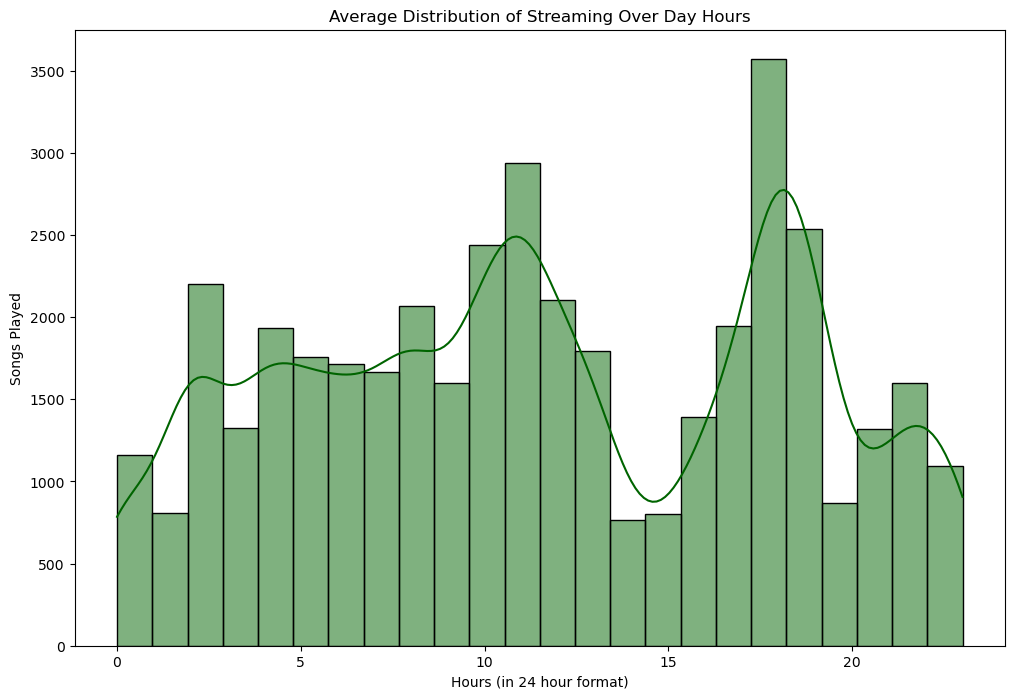

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

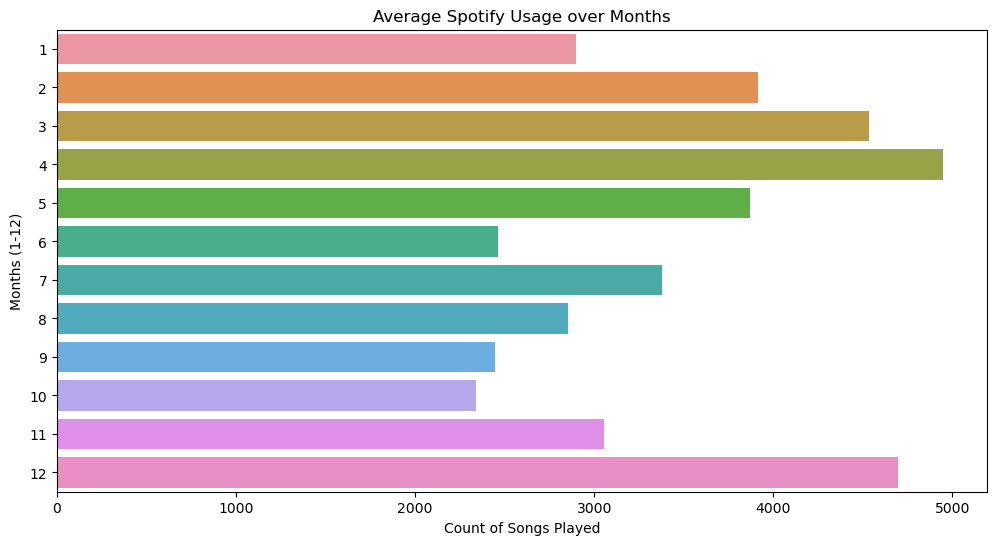

In [80]:
# Assuming spotify_stream_df is a DataFrame with a column named "month" containing values from 1 to 12 representing months.
# Replace "spotify_stream_df" with your actual DataFrame name.

# Define the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the countplot
sns.countplot(y=spotify_stream_df["month"], ax=ax)

# Set title and labels
ax.set_title("Average Spotify Usage over Months")
ax.set_xlabel("Count of Songs Played")
ax.set_ylabel("Months (1-12)")

# Show the plot
plt.show()


In [81]:
# How many hours did I spent on Spotify Streaming since the day I signed up for it
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum()
time_spent_hours

1190.1299999999999

In [82]:
# What is actual usage in percentage compared to to the total possible

In [83]:
date_df = spotify_stream_df["Play-Time"]
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference_hours = time_difference*24
time_difference_hours

5079.516666666666

In [84]:
#Average numbers of songs I played daily

In [85]:
total_songs = spotify_stream_df["master_metadata_track_name"].count()

In [86]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

192.0

In [87]:
#On which day I played maximum number of songs

In [88]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date

C:\Users\Maheedhar Vundela\AppData\Local\Temp\ipykernel_31512\611981327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date


In [89]:
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2020-02-24,466


### My favourite 100 Artist in word could

In [91]:
fav_artist = spotify_stream_df.groupby(["master_metadata_album_artist_name"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

master_metadata_album_artist_name
The Chainsmokers       2448
Calvin Harris          1957
A.R. Rahman            1610
Anirudh Ravichander    1595
Martin Garrix          1335
                       ... 
Maddix                   87
Clean Bandit             86
DJ Khaled                84
Glass Animals            84
Akhil                    83
Name: Count, Length: 100, dtype: int64

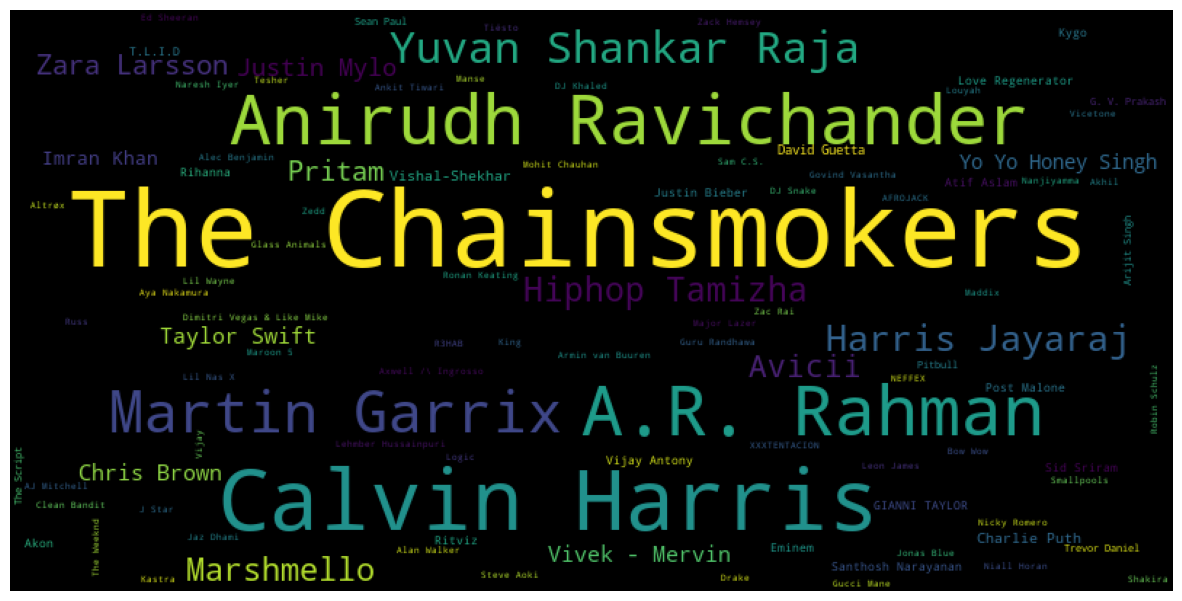

In [92]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_artist)
plot_cloud(wordcloud)

### My Favourite Artist playlist based on count of songs

In [94]:
my_fav_artist_playlist = spotify_stream_df.groupby(["master_metadata_album_artist_name","master_metadata_track_name"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

,,Count
master_metadata_album_artist_name,master_metadata_track_name,
Vivek - Mervin,Orasaadha - Madras Gig,510
Anirudh Ravichander,Sirikkadhey,467
Calvin Harris,I'm Not Alone - 2019 Edit,360
Hiphop Tamizha,Azhage,345
The Chainsmokers,Closer,342
...,...,...
Naresh Iyer,Valayapatti,91
Alec Benjamin,Let Me Down Slowly,91
Yo Yo Honey Singh,Brown Rang,90


### Usage Analysis over a week

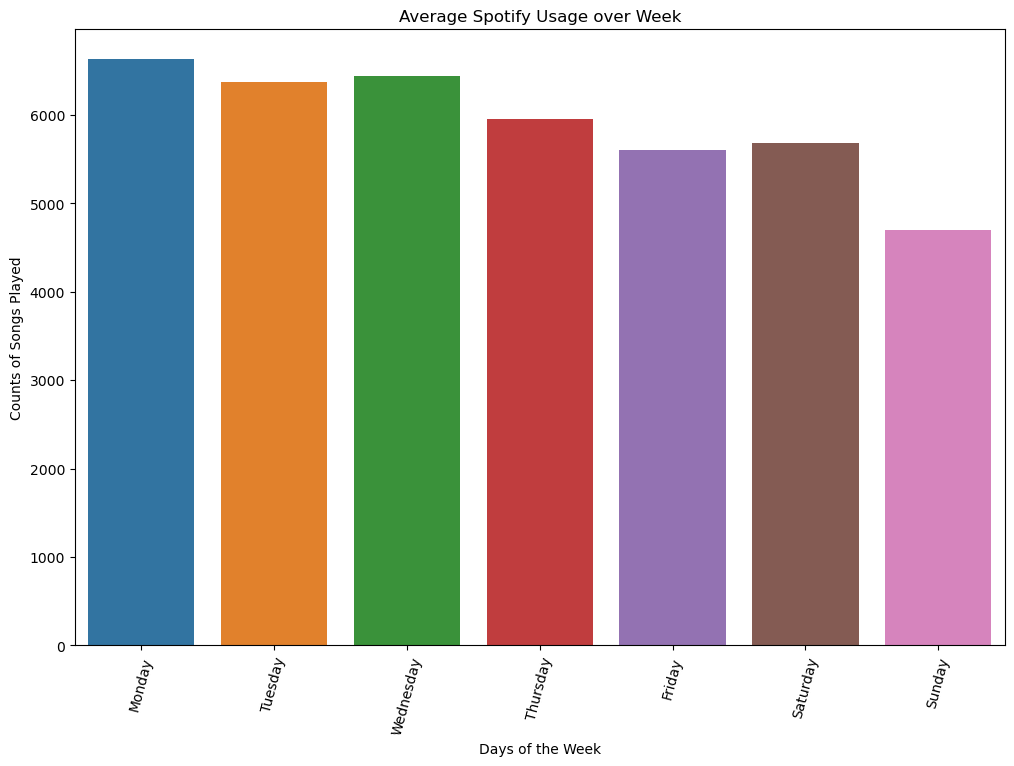

In [96]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

### Usage distribution between Weekday and Weekend

In [97]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,31010
True,10379


In [98]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,31010,74.923289
True,10379,25.076711


C:\Users\Maheedhar Vundela\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Maheedhar Vundela\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


[Text(0.5, 1.0, 'Weekday vs Weekend (Percentage)'),
 Text(0.5, 0, 'Is it Weekend'),
 Text(0, 0.5, 'Percentage of Songs Played')]

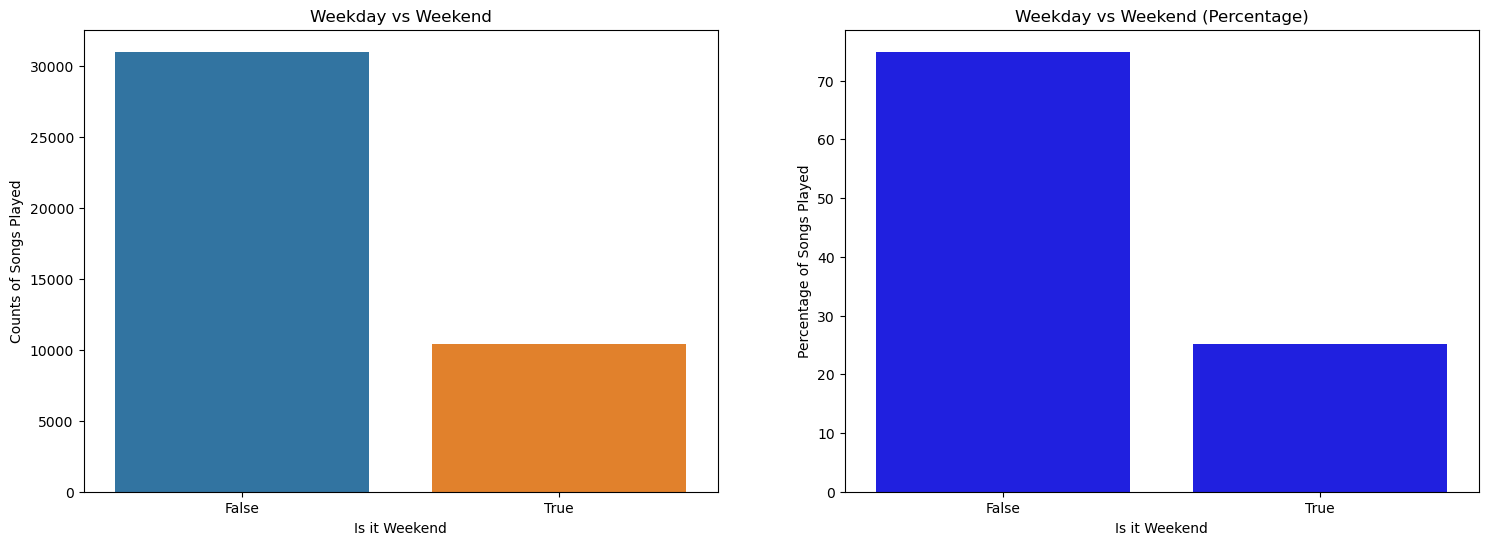

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="blue",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played")